In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv('time_series_covid19_confirmed_global.csv')
df_confirmed = df.iloc[:,1:]
df_confirmed['Total Cases'] = df_confirmed.iloc[:,3:].sum(axis = 1)
df_confirmed = df_confirmed[["Country/Region","Total Cases"]]
df_confirmed = df_confirmed.groupby("Country/Region").sum().reset_index()
df_confirmed = df_confirmed.sort_values("Total Cases", ascending = False)
print(df_confirmed.shape)
df_confirmed.head(10)

(188, 2)


,Country/Region,Total Cases
174,US,622342313
23,Brazil,344491052
79,India,294665410
140,Russia,111895180
134,Peru,60960588
158,Spain,59591451
113,Mexico,54516747
156,South Africa,51969517
178,United Kingdom,50393375
37,Colombia,46062161


/home/cs582/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Confirmed Cases by Country')

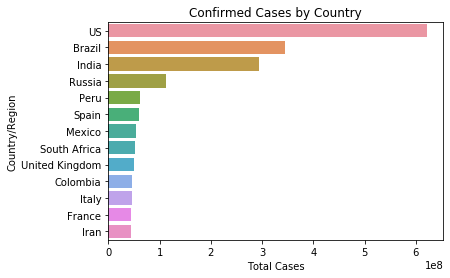

In [81]:
top = 13
ax = sns.barplot(df_confirmed.head(top)["Total Cases"], df_confirmed.head(top)["Country/Region"])
plt.title("Confirmed Cases by Country")

In [67]:
df2 = pd.read_csv("time_series_covid19_deaths_global.csv")
df_deaths = df2.iloc[:,1:]
df_deaths['Total Deaths'] = df_deaths.iloc[:,3:].sum(axis = 1)
df_deaths = df_deaths[["Country/Region","Total Deaths"]]
df_deaths = df_deaths.groupby("Country/Region").sum().reset_index()
df_deaths = df_deaths.sort_values("Total Deaths", ascending = False)
df_deaths.head(10)

,Country/Region,Total Deaths
174,US,23334501
23,Brazil,11939562
178,United Kingdom,6577829
85,Italy,6085127
113,Mexico,5968206
79,India,5512739
62,France,5111366
158,Spain,5008271
134,Peru,2475270
81,Iran,2459001


/home/cs582/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Deaths by Country')

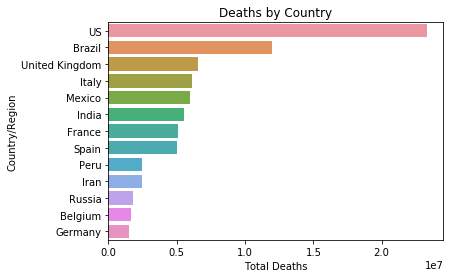

In [82]:
top = 13
ax = sns.barplot(df_deaths.head(top)["Total Deaths"], df_deaths.head(top)["Country/Region"])
plt.title("Deaths by Country")

In [83]:
df3 = pd.read_csv("time_series_covid19_recovered_global.csv")
df_recovered = df3.iloc[:,1:]
df_recovered['Total Recoveries'] = df_recovered.iloc[:,3:].sum(axis = 1)
df_recovered = df_recovered[["Country/Region","Total Recoveries"]]
df_recovered = df_recovered.groupby("Country/Region").sum().reset_index()
df_recovered = df_recovered.sort_values("Total Recoveries", ascending = False)
df_recovered.head(10)

,Country/Region,Total Recoveries
23,Brazil,267838682
79,India,220064065
174,US,200048855
140,Russia,78713374
113,Mexico,43751031
134,Peru,41907729
156,South Africa,39928748
35,Chile,38917156
81,Iran,36749593
37,Colombia,32246465


/home/cs582/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Recoveries by Country')

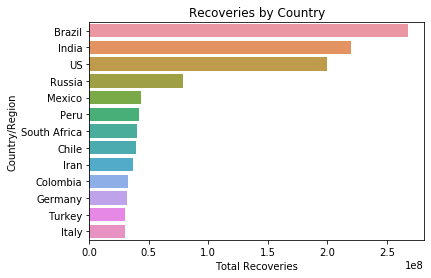

In [84]:
top = 13
ax = sns.barplot(df_recovered.head(top)["Total Recoveries"], df_recovered.head(top)["Country/Region"])
plt.title("Recoveries by Country")

In [93]:
df_loc = df[["Country/Region", "Lat", "Long"]].groupby("Country/Region").mean()

In [107]:
df_full_info = df_loc.merge(df_confirmed, left_on = "Country/Region", right_on = "Country/Region")
df_full_info = df_full_info.merge(df_deaths, left_on = "Country/Region", right_on = "Country/Region")
df_full_info = df_full_info.merge(df_recovered, left_on = "Country/Region", right_on = "Country/Region")
df_full_info["Mortality Rate (%)"] = (df_full_info["Total Deaths"] / df_full_info["Total Cases"]) * 100
df_full_info["Recovery Rate (%)"] = (df_full_info["Total Recoveries"] / df_full_info["Total Cases"]) * 100
print(df_full_info.shape[0], "x", df_full_info.shape[1], "Data Frame")
df_full_info.head(13)

188 x 8 Data Frame


,Country/Region,Lat,Long,Total Cases,Total Deaths,Total Recoveries,Mortality Rate (%),Recovery Rate (%)
0,Afghanistan,33.939110,67.709953,4487922,142063,2758193,3.165452,61.458131
1,Albania,41.153300,20.168300,825474,24325,467513,2.946792,56.635703
2,Algeria,28.033900,1.659600,4044727,177624,2761970,4.391495,68.285696
3,Andorra,42.506300,1.521800,178893,8959,134071,5.008022,74.944799
4,Angola,-11.202700,17.873900,207951,8545,76451,4.109141,36.763949
5,Antigua and Barbuda,17.060800,-61.796400,10820,527,8353,4.870610,77.199630
6,Argentina,-38.416100,-63.616700,33514520,707790,22658806,2.111891,67.608923
7,Armenia,40.069100,45.038200,4526165,84957,3370131,1.877020,74.458863
8,Australia,-32.106275,141.355487,2592530,51413,1980691,1.983121,76.399926
9,Austria,47.516200,14.550100,4005492,121207,3282411,3.026020,81.947761


/home/cs582/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Recovery rate by Country')

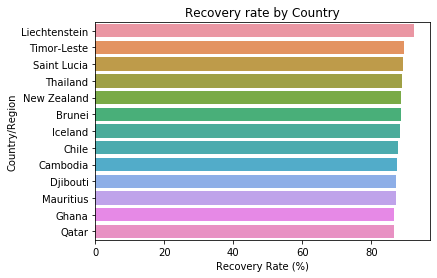

In [113]:
top = 13
recovs = df_full_info[["Country/Region", "Recovery Rate (%)"]].sort_values("Recovery Rate (%)", ascending = False)
ax = sns.barplot(recovs.head(top)["Recovery Rate (%)"], recovs.head(top)["Country/Region"])
plt.title("Recovery rate by Country")

/home/cs582/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Mortality rate by Country')

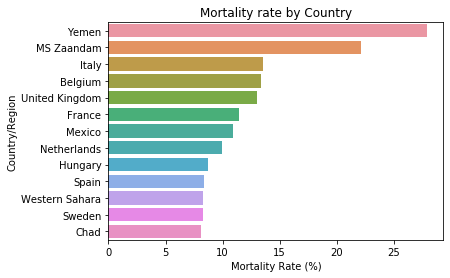

In [117]:
top = 13
mort = df_full_info[["Country/Region", "Mortality Rate (%)"]].sort_values("Mortality Rate (%)", ascending = False)
ax = sns.barplot(mort.head(top)["Mortality Rate (%)"], mort.head(top)["Country/Region"])
plt.title("Mortality rate by Country")